# NETHACK WIKI
https://nethackwiki.com/wiki/Main_Page

In [2]:
import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display

from minihack import LevelGenerator
from minihack import RewardManager

# EXAMPLE 1

In [3]:
# Define a 12x12 room and populate it with
# different objects, monster and features
lvl_gen = LevelGenerator(w=12, h=12)
lvl_gen.add_object("apple", "%")
lvl_gen.add_object("dagger", ")")
lvl_gen.add_trap(name="teleport")
lvl_gen.add_sink()
lvl_gen.add_monster("goblin")
lvl_gen.add_monster("fox", "d",place=(0,1))
# lvl_gen.fill_terrain("rect", "L", 0, 0, 9, 9)

In [4]:
# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple or wielding a dagger
reward_manager.add_eat_event("apple")
reward_manager.add_wield_event("dagger")
# -1 reward for standing on a sink
# but isn't required for terminating
# the episode
reward_manager.add_location_event("sink",reward=-1, terminal_required=False)

In [5]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file=lvl_gen.get_des(),
    reward_manager=reward_manager,
    observation_keys=("chars", "pixel")
)

In [6]:
state = env.reset()
env.render()


Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  ............                                  
                                  d...........                                  
                                  ............                                  
                                  ...#........                                  
                                  ............                                  
                                  .........%..                                  
                           

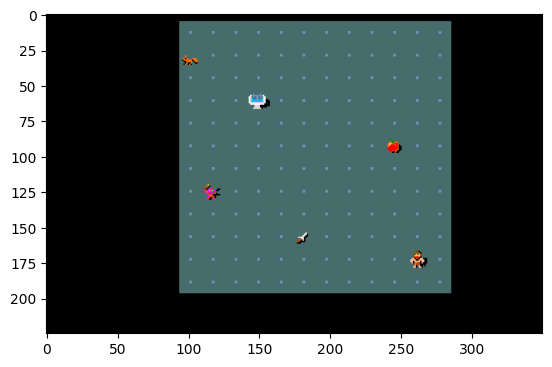

In [7]:
plt.imshow(state['pixel'][75:300, 450:800])

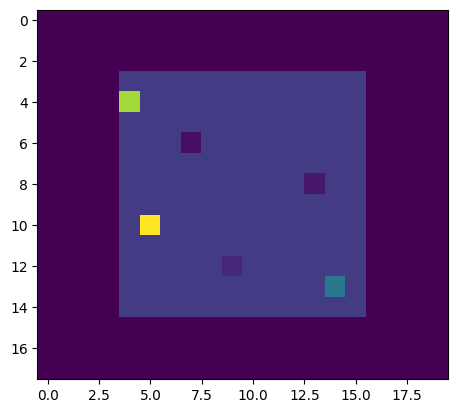

In [8]:
plt.imshow(state['chars'][2:20, 30:50])

# EXAMPLE 2

In [ ]:
# Define the maze as a string
maze = """
--------------------
|.......|.|........|
|.-----.|.|.-----|.|
|.|...|.|.|......|.|
|.|.|.|.|.|-----.|.|
|.|.|...|....|.|.|.|
|.|.--------.|.|.|.|
|.|..........|...|.|
|.|--------------|.|
|..................|
--------------------
"""

In [ ]:
# Set a start and goal positions
lvl_gen = LevelGenerator(map=maze)
lvl_gen.set_start_pos((9, 1))
lvl_gen.add_goal_pos((14, 5))
# Add a Minotaur at fixed position
lvl_gen.add_monster(name="minotaur",place=(19, 9))
# Add wand of death
lvl_gen.add_object("death", "/")

In [ ]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file = lvl_gen.get_des(),
    observation_keys=("chars", "pixel")
)

In [ ]:
state = env.reset()
env.render()

In [ ]:
plt.imshow(state['pixel'][75:300, 450:800])

In [ ]:
game_map = state['chars']
game = state['pixel']

In [ ]:
actions = [2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3 ,3, 0, 0 ,0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 
           3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# env.step(action) fa muovere il personaggio.
# come parametro action è o un intero (0 -> up; 1 -> dx; 2 -> down; 3 -> sx) oppure una lista di interi
image = plt.imshow(game[50:300, 500:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][50:300, 500:800])